In [4]:
import networkx as nx
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(60000, 28, 28)


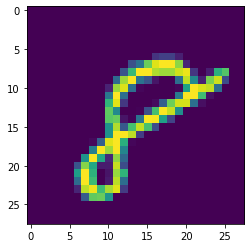

In [40]:
(img, _), _ = mnist.load_data()
print(img.shape)
plt.imshow(img[59999])
plt.show()

In [20]:
def graph_generator(data):
    G = nx.grid_2d_graph(data.shape[1],data.shape[2])
    nx.set_node_attributes(G, 0, "value")
    for k in range(data.shape[0]):
        for i, iv in enumerate(data[k]):
            for j, jv in enumerate(iv):
                G.nodes[i, j]["value"] = jv
        yield G


In [7]:
def print_2d_graph(G):
    pos = {(x, y):(y, -x) for x, y in G.nodes()}
    plt.figure(figsize=(plt.rcParams["figure.figsize"][0]*2, plt.rcParams["figure.figsize"][1]*2))
    colors = [x["value"]/255 for x in G.nodes().values()]
    nx.draw(G, pos, node_size=70, node_color=colors)

In [37]:
import itertools
graphs = graph_generator(img)
# sliced_gen = itertools.islice(graphs, 60000)
graph_list = [x for x in graphs]
# print(len(graph_list))
# print_2d_graph(graph_list[10])
